In [10]:
import numpy as np
from deepsy.core.model import Model
from deepsy.core.nn import NeuralNetwork
from deepsy.core.layer import Layer
from deepsy.core.functions.activation_functions import *
from deepsy.core.functions.loss_functions import *
from deepsy.core.functions.optimizers import *
import pandas as pd
from sklearn.model_selection import train_test_split

In [11]:
dataset = pd.read_csv('data/regression/Student_Performance.csv')
Y = dataset['Performance Index']
X = dataset.drop(columns=['Performance Index'])
X = pd.get_dummies(X, columns=['Extracurricular Activities'])

X = (X - X.mean()) / X.std()
Y = Y / 100

X, Y = X.values, Y.values

print('Dataset shape: {}'.format(dataset.shape))
print()
print('Dataset head:')
print(dataset.head())
print()
print('X first 5:')
print(X[:5])
print()
print('Y first 5:')
print(Y[:5])
print()

Dataset shape: (10000, 6)

Dataset head:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  

X first 5:
[[ 0.77514895  1.70409044  1.45613179 -1.24969145 -1.01040412  1.01040412]
 [-0.38346141  0.72387648 -1.49221962 -0.9009371   0.98960404 -0.98

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

nn = NeuralNetwork(layers=[
    Layer(nr_neurons=8, nr_in_features=6, activation_func=ReLU()),
    Layer(nr_neurons=12, nr_in_features=8, activation_func=ReLU()),
    Layer(nr_neurons=1, nr_in_features=12, activation_func=ReLU())
])

model = Model(nn, loss_func=MSE(), optimizer=GradientDescent(0.2))
model.train(X_train.T, Y_train.T, 400)

Epoch 1: cost = 0.2673481096925002
Epoch 2: cost = 0.15385204719340254
Epoch 3: cost = 0.1485909695491785
Epoch 4: cost = 0.1413745604500998
Epoch 5: cost = 0.13026413169144319
Epoch 6: cost = 0.11369880825998682
Epoch 7: cost = 0.10277950124733617
Epoch 8: cost = 0.09565120273452858
Epoch 9: cost = 0.09008109171951591
Epoch 10: cost = 0.08542361995867356
Epoch 11: cost = 0.08133781186665337
Epoch 12: cost = 0.07764540784555009
Epoch 13: cost = 0.07432942793574036
Epoch 14: cost = 0.07131635675705493
Epoch 15: cost = 0.06852088248804739
Epoch 16: cost = 0.065807712539601
Epoch 17: cost = 0.06323359334761015
Epoch 18: cost = 0.060762460947566495
Epoch 19: cost = 0.05837718375547576
Epoch 20: cost = 0.05612097071703155


Epoch 21: cost = 0.054020858694326546
Epoch 22: cost = 0.05203129685006483
Epoch 23: cost = 0.050187666070311394
Epoch 24: cost = 0.04839894583948215
Epoch 25: cost = 0.0467438309956015
Epoch 26: cost = 0.04519540796354604
Epoch 27: cost = 0.043684812036303707
Epoch 28: cost = 0.04221402218199479
Epoch 29: cost = 0.0408654630086226
Epoch 30: cost = 0.03955935642189428
Epoch 31: cost = 0.03829350256817934
Epoch 32: cost = 0.037061617571324916
Epoch 33: cost = 0.0358698232951273
Epoch 34: cost = 0.034688614105448705
Epoch 35: cost = 0.033496059853159156
Epoch 36: cost = 0.03235463395994163
Epoch 37: cost = 0.031245666568457956
Epoch 38: cost = 0.030184636391022906
Epoch 39: cost = 0.029174811552958906
Epoch 40: cost = 0.028193706402194648
Epoch 41: cost = 0.027254021001469404
Epoch 42: cost = 0.02633212738571778
Epoch 43: cost = 0.02543855541204823
Epoch 44: cost = 0.024594056087341904
Epoch 45: cost = 0.023803317658173673
Epoch 46: cost = 0.02306132703187699
Epoch 47: cost = 0.022349770

In [13]:
Y_predicted, cost = model.validate(X_test.T, Y_test.T)
print('Cost: {}'.format(cost))

for i in range(len(Y_predicted[0])):
    print('predicted: {}   actual: {}'.format(Y_predicted[0][i], Y_test[i]))

Cost: 0.003029126522374162
predicted: 0.5772573693848692   actual: 0.72
predicted: 0.2696946936311474   actual: 0.42
predicted: 0.5743955478756789   actual: 0.51
predicted: 0.5209987939009463   actual: 0.58
predicted: 0.6836249438266335   actual: 0.76
predicted: 0.6093110300013955   actual: 0.62
predicted: 0.030484456889771527   actual: 0.26
predicted: 0.6797469156446535   actual: 0.72
predicted: 0.15658228833587767   actual: 0.25
predicted: 0.6003951939684902   actual: 0.62
predicted: 0.549255129098871   actual: 0.6
predicted: 0.44854147944006895   actual: 0.38
predicted: 0.8699844644765014   actual: 0.85
predicted: 0.4518910528513314   actual: 0.5
predicted: 0.5859348177009608   actual: 0.71
predicted: 0.367918465028348   actual: 0.46
predicted: 0.7665969030482473   actual: 0.82
predicted: 0.47788287797941065   actual: 0.63
predicted: 0.3307491422254831   actual: 0.41
predicted: 0.4531993544725079   actual: 0.55
predicted: 0.29937074992369317   actual: 0.47
predicted: 0.3459543274477

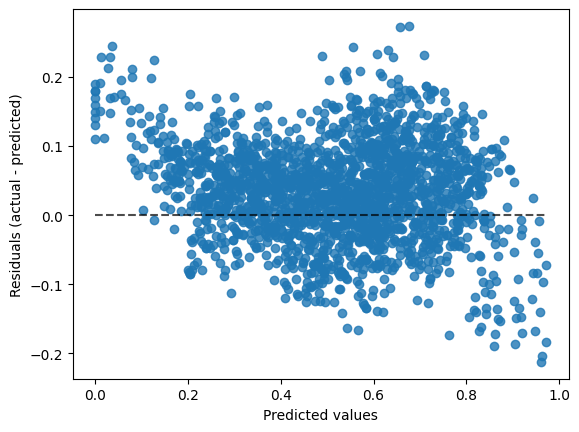

In [14]:
from sklearn.metrics import PredictionErrorDisplay
import matplotlib.pyplot as plt

display = PredictionErrorDisplay(y_true=Y_test, y_pred=Y_predicted)
display.plot()
plt.show()